In [4]:
from tkinter import *
import random
import time
import enum
import numpy as np
import random
from PIL import ImageTk,Image
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

# Define useful parameters
size_of_board = 600
rows = 10
cols = 10
DELAY = 500
snake_initial_length = 5
symbol_size = (size_of_board / 3 - size_of_board / 8) / 2
symbol_thickness = 2
RED_COLOR = "#EE4035"
BLUE_COLOR = "#0492CF"
GREEN_COLOR = "#7BC043"

BLUE_COLOR_LIGHT = '#67B0CF'
RED_COLOR_LIGHT = '#EE7E77'

class StrEnum(str, enum.Enum):
    pass

In [5]:
class SnakeAndApple:
    
    class Directions(StrEnum):
        UP = "Up"
        DOWN = "Down"
        LEFT = "Left"
        RIGHT = "Right"

    def __init__(self):
        self.set_window()
        self.set_forbidden_directions()
        self.snake_heading = self.Directions.RIGHT

    def set_window(self):
        self.window = Tk()
        self.window.title("Snake-and-Apple")
        self.canvas = Canvas(self.window, width=size_of_board, height=size_of_board)
        self.canvas.pack()
        # Input from user in form of clicks and keyboard
        self.window.bind("<Key>", self.key_input)
        self.window.bind("<Button-1>", self.mouse_input)

    def set_forbidden_directions(self):
        self.forbidden_directions = {}
        self.forbidden_directions[self.Directions.RIGHT] = self.Directions.LEFT
        self.forbidden_directions[self.Directions.LEFT] = self.Directions.RIGHT
        self.forbidden_directions[self.Directions.UP] = self.Directions.DOWN
        self.forbidden_directions[self.Directions.DOWN] = self.Directions.UP

    def initialize_board(self):
        self.board = []
        self.apple_obj = []
        self.old_apple_cell = []

        for i in range(rows):
            for j in range(cols):
                self.board.append((i, j))

        if self.plot:
            for i in range(rows):
                self.canvas.create_line(
                    i * size_of_board / rows, 0, i * size_of_board / rows, size_of_board,
                )

            for i in range(cols):
                self.canvas.create_line(
                    0, i * size_of_board / cols, size_of_board, i * size_of_board / cols,
                )

    def initialize_snake(self):
        self.snake = []
        self.crashed = False
        self.got_apple = False
        self.snake_heading = self.Directions.RIGHT
        self.last_key = self.snake_heading
        self.snake_objects = []
        for i in range(snake_initial_length):
            self.snake.append((i, 0))

    def check_if_key_valid(self, key):
        return key in [action for action in self.Directions] and self.forbidden_directions[self.snake_heading] != key

    def mouse_input(self, event):
        # self.play_again()
        self.window.destroy()

    def key_input(self, event):
        if not self.crashed:
            key_pressed = event.keysym
            # Check if the pressed key is a valid key
            if self.check_if_key_valid(key_pressed):
                self.last_key = key_pressed

    def display_gameover(self):
        score = len(self.snake)
        self.canvas.delete("all")
        score_text = "Scores \n"

        # put gif image on canvas
        # pic's upper left corner (NW) on the canvas is at x=50 y=10

        self.canvas.create_text(
            size_of_board / 2,
            3 * size_of_board / 8,
            font="cmr 40 bold",
            fill=GREEN_COLOR,
            text=score_text,
        )
        score_text = str(score)
        self.canvas.create_text(
            size_of_board / 2,
            1 * size_of_board / 2,
            font="cmr 50 bold",
            fill=BLUE_COLOR,
            text=score_text,
        )
        time_spent = str(np.round(time.time() - self.begin_time, 1)) + 'sec'
        self.canvas.create_text(
            size_of_board / 2,
            3 * size_of_board / 4,
            font="cmr 20 bold",
            fill=BLUE_COLOR,
            text=time_spent,
        )
        score_text = "Click to play again \n"
        self.canvas.create_text(
            size_of_board / 2,
            15 * size_of_board / 16,
            font="cmr 20 bold",
            fill="gray",
            text=score_text,
        )

    def place_apple(self):
        # Place apple randomly anywhere except at the cells occupied by snake
        # unoccupied_cels = set(self.board) - set(self.snake)
        # self.apple_cell = random.choice(list(unoccupied_cels))
        row_h = int(size_of_board / rows)
        col_w = int(size_of_board / cols)
        x1 = self.apple_cell[0] * row_h
        y1 = self.apple_cell[1] * col_w
        x2 = x1 + row_h
        y2 = y1 + col_w
        if self.plot:
            self.apple_obj = self.canvas.create_rectangle(
                x1, y1, x2, y2, fill=RED_COLOR_LIGHT, outline=BLUE_COLOR,
            )

    def display_snake(self, mode=""):
        # Remove tail from display if it exists
        if self.snake_objects != []:
            self.canvas.delete(self.snake_objects.pop(0))
        if mode == "complete":
            for i, cell in enumerate(self.snake):
                # print(cell)
                row_h = int(size_of_board / rows)
                col_w = int(size_of_board / cols)
                x1 = cell[0] * row_h
                y1 = cell[1] * col_w
                x2 = x1 + row_h
                y2 = y1 + col_w
                self.snake_objects.append(
                    self.canvas.create_rectangle(
                        x1, y1, x2, y2, fill=BLUE_COLOR, outline=BLUE_COLOR,
                    )
                )
        else:
            # only update head
            cell = self.snake[-1]
            row_h = int(size_of_board / rows)
            col_w = int(size_of_board / cols)
            x1 = cell[0] * row_h
            y1 = cell[1] * col_w
            x2 = x1 + row_h
            y2 = y1 + col_w
            self.snake_objects.append(
                self.canvas.create_rectangle(
                    x1, y1, x2, y2, fill=BLUE_COLOR, outline=RED_COLOR,
                )
            )
            if self.snake[0] == self.old_apple_cell:
                self.snake.insert(0, self.old_apple_cell)
                self.old_apple_cell = []
                tail = self.snake[0]
                row_h = int(size_of_board / rows)
                col_w = int(size_of_board / cols)
                x1 = tail[0] * row_h
                y1 = tail[1] * col_w
                x2 = x1 + row_h
                y2 = y1 + col_w
                self.snake_objects.insert(
                    0,
                    self.canvas.create_rectangle(
                        x1, y1, x2, y2, fill=BLUE_COLOR, outline=RED_COLOR
                    ),
                )
            self.window.update()

    def start(self):
        self.canvas.delete("all")
        self.initialize_board()
        self.initialize_snake()
        # Place apple randomly anywhere except at the cells occupied by snake
        # random.seed(0)
        unoccupied_cels = set(self.board) - set(self.snake)
        self.apple_cell = random.choice(list(unoccupied_cels))
        self.place_apple()
        if self.plot:
            self.display_snake(mode="complete")
        self.begin_time = time.time()

    def play_again(self):
        self.canvas.delete("all")
        self.initialize_board()
        self.initialize_snake()
        self.place_apple()
        if self.plot:
            self.display_snake(mode="complete")
        self.begin_time = time.time()

    def update_snake(self, key):
        # Check if it hit the wall or its own body
        tail = self.snake[0]
        head = self.snake[-1]
        if tail != self.old_apple_cell:
            self.snake.pop(0)
        if key == self.Directions.LEFT:
            self.snake.append((head[0] - 1, head[1]))
        elif key == self.Directions.RIGHT:
            self.snake.append((head[0] + 1, head[1]))
        elif key == self.Directions.UP:
            self.snake.append((head[0], head[1] - 1))
        elif key == self.Directions.DOWN:
            self.snake.append((head[0], head[1] + 1))

        head = self.snake[-1]
        if (
                head[0] > cols - 1
                or head[0] < 0
                or head[1] > rows - 1
                or head[1] < 0
                or len(set(self.snake)) != len(self.snake)
        ):
            # Hit the wall / Hit on body
            self.crashed = True
            self.reward = -100
        elif self.apple_cell == head:
            # Got the apple
            self.got_apple = True
            if self.plot:
                self.old_apple_cell = self.apple_cell
                self.canvas.delete(self.apple_obj)
                self.place_apple()
                self.display_snake()
            self.reward = 100
        else:
            self.snake_heading = key
            if self.plot:
                self.display_snake()
            self.reward = -1

    # Q_learning method
    def actions(self):
        # 0: forward
        # 1: right
        # 2: left
        if self.snake_heading == self.Directions.UP:
            return [self.snake_heading, self.Directions.RIGHT, self.Directions.LEFT]
        elif self.snake_heading == self.Directions.LEFT:
            return [self.snake_heading, self.Directions.UP, self.Directions.DOWN]
        elif self.snake_heading == self.Directions.DOWN:
            return [self.snake_heading, self.Directions.LEFT, self.Directions.RIGHT]
        elif self.snake_heading == self.Directions.RIGHT:
            return [self.snake_heading, self.Directions.DOWN, self.Directions.UP]
    
    def initialize_q_table(self):
        self.q_table = {}
        for i in range(cols):
            for j in range(rows):
                for dit in self.Directions:
                    self.q_table[(i,j),dit] = np.random.random(len(self.actions()))

    def display_learning_finished(self):
        score = len(self.snake)
        self.canvas.delete("all")
        score_text = "Learning Finished... \n"
        self.canvas.create_text(
            size_of_board / 2,
            3 * size_of_board / 8,
            font="cmr 40 bold",
            fill=GREEN_COLOR,
            text=score_text,
        )
        score_text = "Let's Play! \n"
        self.canvas.create_text(
            size_of_board / 2,
            5 * size_of_board / 8,
            font="cmr 40 bold",
            fill=GREEN_COLOR,
            text=score_text,
        )

    def plot_rewards(self):
        plt.plot(self.rewards)
        plt.xlabel('epoch')
        plt.ylabel('sum of rewards')
        plt.show()

    def learnQ(self, max_itr, alpha, gamma):
        
        self.initialize_q_table()
        self.plot = False
        self.start()
        self.rewards = []
        epsilon = 1
        for epoch in range(max_itr):
            if not epoch == 0:
                self.play_again()
            sum_reward = 0
            epsilon /= (0.1**(-1/max_itr))
            while True:
                state = self.snake[-1]
                heading = self.snake_heading
                if np.random.random() < epsilon:
                    # choose random action (explore)
                    action_idx = random.choice(range(len(self.actions())))
                else:
                    # choose best action (exploit)
                    action_idx = np.argmax(self.q_table[state,heading])

                # update Q table
                self.update_snake(self.actions()[action_idx])
                sum_reward += self.reward

                if self.got_apple:
                    break
                if self.crashed:
                    self.play_again()
                next_state = self.snake[-1]
                next_heading = self.snake_heading
                # noisy_sample = self.reward + gamma*np.max(self.q_table[next_state,next_heading])
                noisy_sample = self.reward + gamma*np.max(self.q_table[next_state,next_heading])
                self.q_table[state,heading][action_idx] += alpha*(noisy_sample - self.q_table[state,heading][action_idx])
                
            self.rewards.append(sum_reward)
        self.plot_rewards()

    def learnSarsa(self, max_itr, alpha, gamma):
        self.initialize_q_table()
        self.plot = False
        self.start()
        self.rewards = []
        epsilon = 1
        for epoch in range(max_itr):
            if not epoch == 0:
                self.play_again()
            sum_reward = 0
            epsilon /= (0.1**(-1/max_itr))

            state = self.snake[-1]
            heading = self.snake_heading
            if np.random.random() < epsilon:
                # choose random action (explore)
                action_idx = random.choice(range(len(self.actions())))
            else:
                # choose best action (exploit)
                action_idx = np.argmax(self.q_table[state,heading])

            while True:
                self.update_snake(self.actions()[action_idx])
                sum_reward += self.reward

                if self.got_apple:
                    break
                if self.crashed:
                    self.play_again()

                # update Q table
                next_state = self.snake[-1]
                next_heading = self.snake_heading
                if np.random.random() < epsilon:
                    # choose random action (explore)
                    next_action_idx = random.choice(range(len(self.actions())))
                else:
                    # choose best action (exploit)
                    next_action_idx = np.argmax(self.q_table[next_state,next_heading])

                noisy_sample = self.reward + gamma*self.q_table[next_state,next_heading][next_action_idx]
                self.q_table[state,heading][action_idx] += alpha*(noisy_sample - self.q_table[state,heading][action_idx])
                state = next_state
                heading = next_heading
                action_idx = next_action_idx

            self.rewards.append(sum_reward)
        self.plot_rewards()

    def playQ(self, max_itr):
        self.plot = True
        self.display_learning_finished()
        self.window.update()
        time.sleep(5)
        self.play_again()
        self.window.update()
        sum_reward = 0
        for epoch in range(max_itr):
            state = self.snake[-1]
            heading = self.snake_heading
            action = self.actions()[np.argmax(self.q_table[state,heading])]
            self.window.after(DELAY, self.update_snake(action))
            sum_reward += self.reward
            if self.crashed:
                print('crashed!')
                break
            if self.got_apple:
                print('got apple!')
                break
        print('total reward:', sum_reward)
        time.sleep(5)
    
    def close(self):
        self.window.destroy()

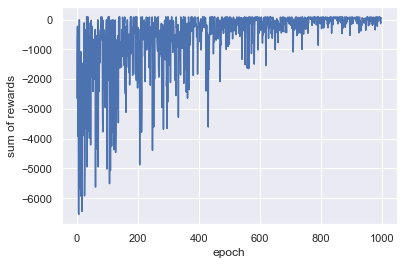

got apple!
total reward: 87


In [6]:
# aplha: learning_rate
# gamma: discount factor
game = SnakeAndApple()
game.learnSarsa(max_itr=1000, alpha=0.1, gamma=0.6)
game.playQ(max_itr=100)
game.close()